# **Lasso, Ridge and ElasticNet regression on boston dataset**

# **Import packages**

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns 
from matplotlib import pyplot as plt

%matplotlib inline

# **Load data**

In [56]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [57]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [58]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


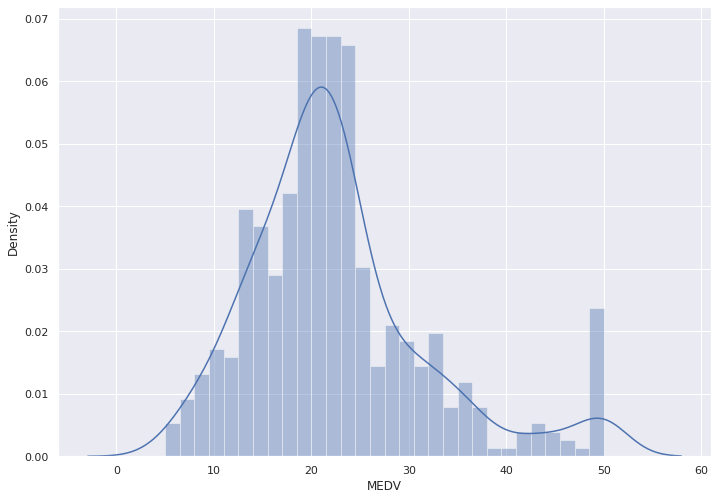

In [59]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

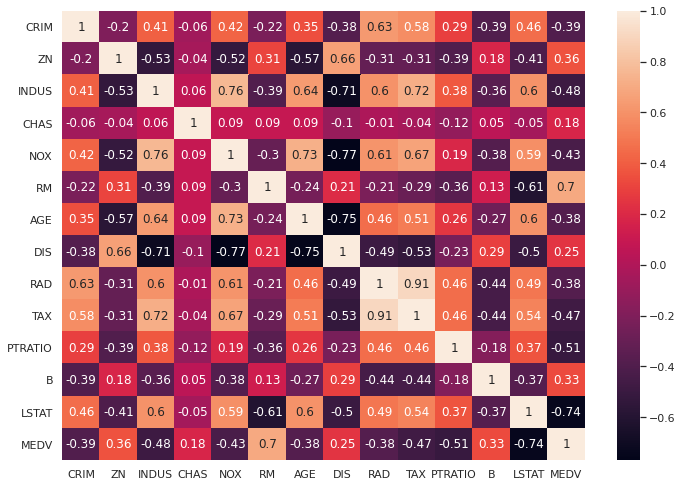

In [60]:
correlation_matrix = boston.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True)

In [61]:
X = boston.iloc[:,:-1]
y = boston['MEDV']



# **Splitting the data into training and testing sets**



In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)


# **Feature Scaling**



In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Lasso regression**

In [64]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

lasso_model = Lasso(alpha=1)
lasso_model.fit(X_train, y_train)

print(lasso_model)
print("\nCoefficient of the features:\n{}\n".format(lasso_model.coef_))
print("Intercept:\n{}\n".format(lasso_model.intercept_))

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

Coefficient of the features:
[-0.01238985  0.         -0.          0.0384036  -0.          3.07945798
 -0.         -0.         -0.         -0.         -1.22090499  0.44979801
 -3.37659049]

Intercept:
22.796534653465375



# **Lasso model evaluation for training set**



The model performance for training set
--------------------------------------
RMSE is 5.290949284847797
R2 score is 0.6777593244917709




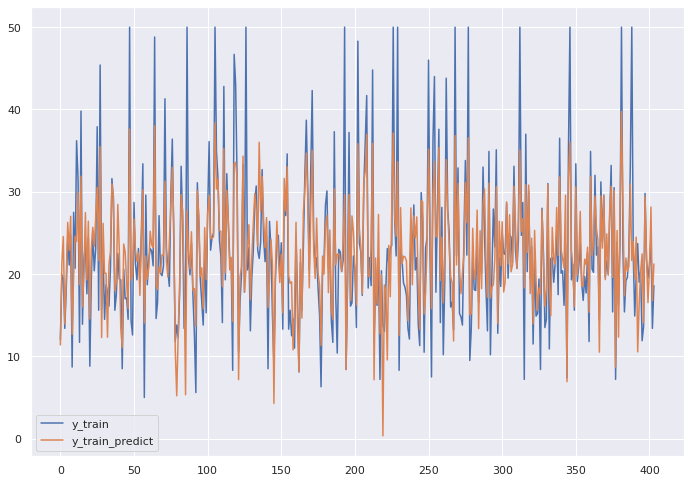

In [65]:
y_train_predict = lasso_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("\n")
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

plt.plot(np.arange(0, y_train.shape[0]), y_train, label="y_train")
plt.plot(np.arange(0, y_train_predict.shape[0]), y_train_predict, label="y_train_predict")
plt.legend()
plt.show()

# **Lasso model evaluation for testing set**



The model performance for testing set
--------------------------------------
RMSE is 5.2514466365121475
R2 score is 0.6239428734251422




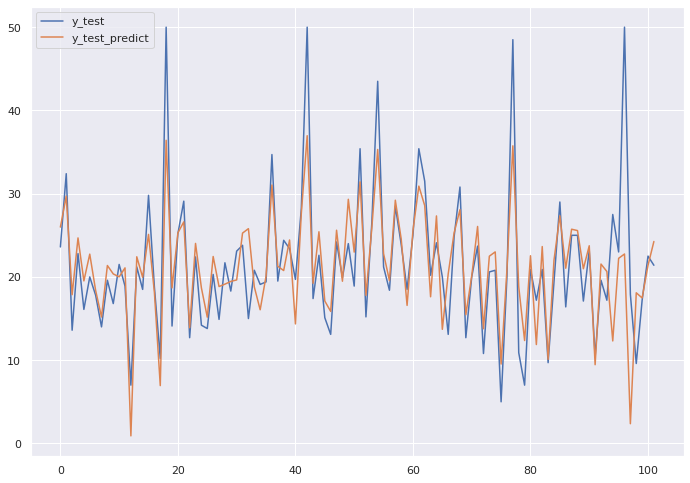

In [66]:
y_test_predict = lasso_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("\n")
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

plt.plot(np.arange(0, y_test.shape[0]), y_test, label="y_test")
plt.plot(np.arange(0, y_test_predict.shape[0]), y_test_predict, label="y_test_predict")
plt.legend()
plt.show()

# **Ridge regression**

In [67]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train, y_train)

print(ridge_model)
print("\nCoefficient of the features:\n{}\n".format(ridge_model.coef_))
print("Intercept:\n{}\n".format(ridge_model.intercept_))

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

Coefficient of the features:
[-0.99218679  0.6777488   0.2522143   0.72248078 -1.99083465  3.15157218
 -0.17726162 -3.04502895  2.17324941 -1.69555879 -2.02783351  1.127197
 -3.59897667]

Intercept:
22.796534653465375



# **Ridge model evaluation for training set**



The model performance for training set
--------------------------------------
RMSE is 4.652176971845966
R2 score is 0.7508702362003778




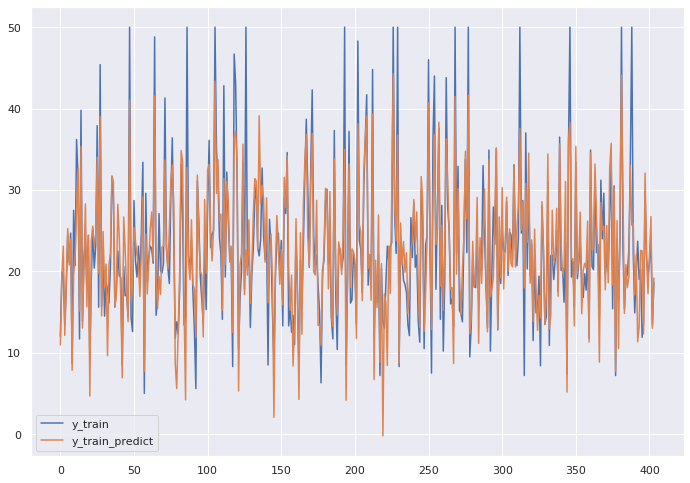

In [68]:
y_train_predict = ridge_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("\n")
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

plt.plot(np.arange(0, y_train.shape[0]), y_train, label="y_train")
plt.plot(np.arange(0, y_train_predict.shape[0]), y_train_predict, label="y_train_predict")
plt.legend()
plt.show()

# **Ridge model evaluation for testing set**



The model performance for testing set
--------------------------------------
RMSE is 4.930811680696355
R2 score is 0.6684624359643558




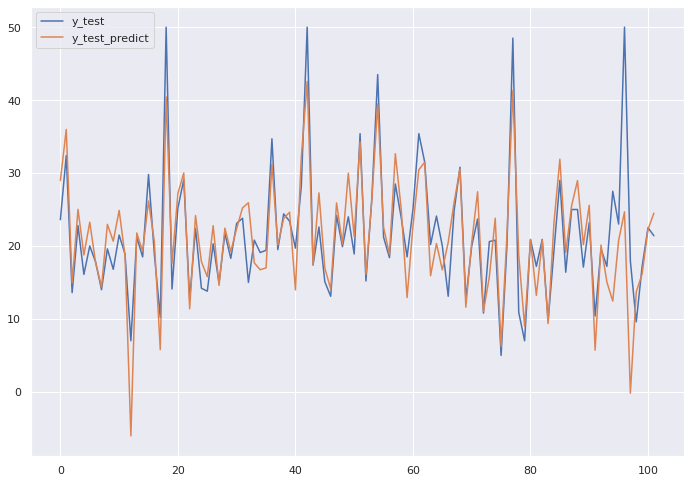

In [69]:
y_test_predict = ridge_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("\n")
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

plt.plot(np.arange(0, y_test.shape[0]), y_test, label="y_test")
plt.plot(np.arange(0, y_test_predict.shape[0]), y_test_predict, label="y_test_predict")
plt.legend()
plt.show()

# **ElasticNet regression**

In [70]:
from sklearn.linear_model import ElasticNet

elasticnet_model = ElasticNet(alpha=1)
elasticnet_model.fit(X_train, y_train)

print(elasticnet_model)
print("\nCoefficient of the features:\n{}\n".format(elasticnet_model.coef_))
print("Intercept:\n{}\n".format(elasticnet_model.intercept_))

ElasticNet(alpha=1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Coefficient of the features:
[-0.40827814  0.         -0.18409588  0.46384093 -0.2232498   2.55110853
 -0.         -0.         -0.         -0.33558655 -1.22110389  0.60097788
 -2.35523182]

Intercept:
22.796534653465372



# **ElasticNet model evaluation for training set**



The model performance for training set
--------------------------------------
RMSE is 5.4330752848993775
R2 score is 0.660214683102057




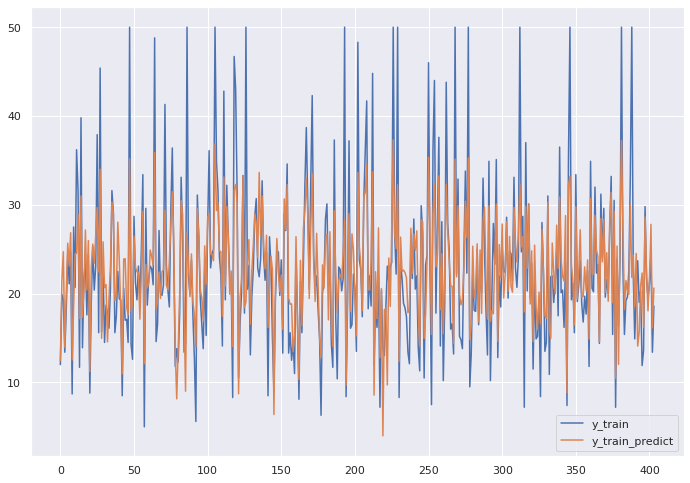

In [71]:
y_train_predict = elasticnet_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("\n")
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

plt.plot(np.arange(0, y_train.shape[0]), y_train, label="y_train")
plt.plot(np.arange(0, y_train_predict.shape[0]), y_train_predict, label="y_train_predict")
plt.legend()
plt.show()

# **ElasticNet model evaluation for testing set**



The model performance for testing set
--------------------------------------
RMSE is 5.32528385367916
R2 score is 0.6132935340284021




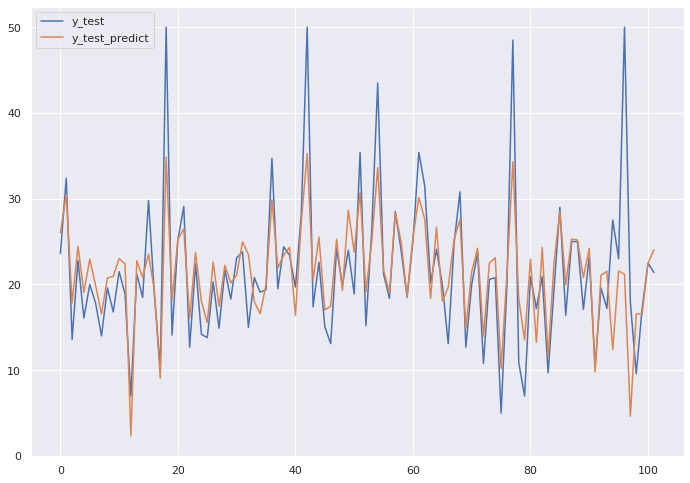

In [72]:
y_test_predict = elasticnet_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("\n")
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

plt.plot(np.arange(0, y_test.shape[0]), y_test, label="y_test")
plt.plot(np.arange(0, y_test_predict.shape[0]), y_test_predict, label="y_test_predict")
plt.legend()
plt.show()

# **Source**


*   https://github.com/animesh-agarwal/Machine-Learning-Datasets/blob/master/boston-housing/Polynomial_Regression.ipynb

*   https://towardsdatascience.com/polynomial-regression-bbe8b9d97491

*   https://www.pluralsight.com/guides/linear-lasso-ridge-regression-scikit-learn
